In [102]:
import tensorflow_datasets as tfds


import main

dataset, info = tfds.load('mnist',split='train[:1%]',with_info=True)

In [108]:
import e
import importlib
import numpy as np
importlib.reload(e)
#inp, out = e.to_ndarray(dataset)
inp = np.reshape([np.array(el['image']) for el in dataset],(600,28,28,1))
    
out = np.reshape([np.array(el['label'].numpy()) for el in dataset], (-1, 1))
print(len(inp))

tsize = 30
testi = inp[-30:]
testo = out[-30:]
inp = inp[:-30]
out = out[:-30]

ValueError: cannot reshape array of size 470400 into shape (28,28,1)

In [105]:
import layers

In [106]:


l = layers.conv((28,28),padb=False)
s = l.weightShape(1)[0]
l.weights = np.reshape([5,-1,-1,-1,-1,-1,-1,-1,-1],s)
print(l.forwardTransform(inp[1]))
#n = l.appendDense(10,activation=main.layer.SOFTMAX)

AttributeError: 'conv' object has no attribute 'amtNeurons'

In [70]:
m = main.model(l,cost=main.model.CROSS,learningRate=.0001)

In [71]:
costs = m.train(inp,out,numIterations=100)
print(costs)


[83217.9153854342, 80455.79270215673, 77754.87654954448, 75161.81326477538, 72659.69419356756, 70265.93413334244, 68001.01960439041, 65861.67679943136, 63859.34210139273, 61943.28650787505, 60093.69828822919, 58321.643414892125, 56624.458736334476, 55009.08684943813, 53475.651778885775, 51991.06893823715, 50563.74592347309, 49203.53715946808, 47910.82979583596, 46673.334697534, 45473.47798480165, 44296.82752438426, 43145.776766113064, 42019.16861173902, 40913.95796903162, 39834.27230642679, 38790.70194577883, 37774.57757822769, 36783.10585555476, 35821.738185581125, 34892.650793852365, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


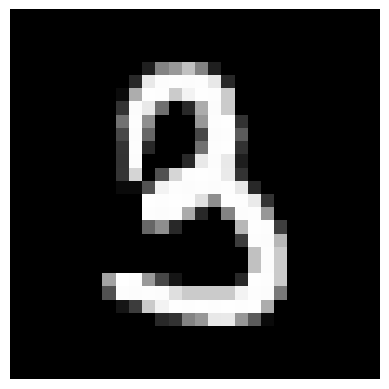

Actual: [3]
18


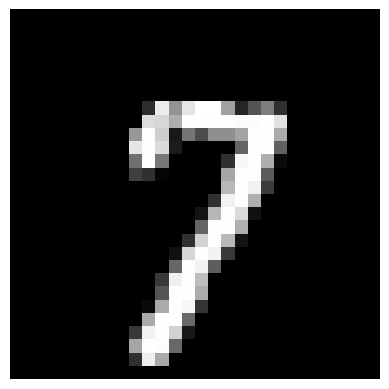

Actual: [7]
18


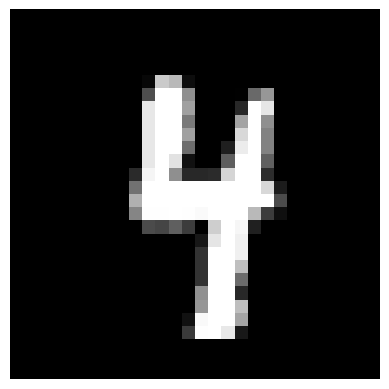

Actual: [4]
18


In [59]:
import matplotlib.pyplot as plt
import numpy as np
pred = m.predict(testi)
pred = [[(i, v) for i, v in enumerate(ex)] for ex in pred]
s = 4
tsize = 3
for i in range(s,tsize+s):
    image = np.reshape(testi[i],(28,28))
    plt.imshow(image,cmap='gray')
    plt.axis('off')
    plt.show()
    print(f'Actual: {testo[i]}')
    print(np.argmax(pred[i]))